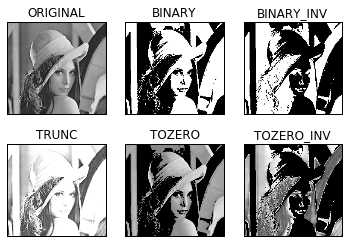

In [1]:
#画像の二値化とかなど
#matplotlibの部分を修正してキチンと表示するようにしたCELLを下に追加
#ここは、表示の際にオートスケールされるまま担っている

%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lenna.jpg', 0) #グレーで読み出し
#最初の返り値は二値化する閾値、大津の二値化を使った場合は最適化された値が、それ以外は単純に指定した値が返る
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)#二値化
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)#二値化の白黒反転
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)#閾値を超えるものは255にするそれ以外はそのまま

#matplotlib はデフォルトはオートスケールになるため、
#なんかネットで調べたTRUNCと挙動が違うような、閾値を超えるものは閾値にって書いてあるしそっちのがTRUNC感出てるのに
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)#閾値以下をゼロにそれ以外はそのまま
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)#閾値以上をゼロにそれ以外はそのまま

titles = ['ORIGINAL', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

#どうもmatplotlibの表示周りで正規化がかかっている？
#出力は0-127だけどそれを0-255階調にスケーリングしてるっぽい
cv2.imshow('test',thresh3)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[127 127 127 ..., 127 127 127]
 [127 127 127 ..., 127 127 127]
 [127 127 127 ..., 127 127  99]
 ..., 
 [ 64  69  70 ...,  59  56  54]
 [ 80  91  88 ...,  58  57  57]
 [ 93  92  86 ...,  62  59  63]]


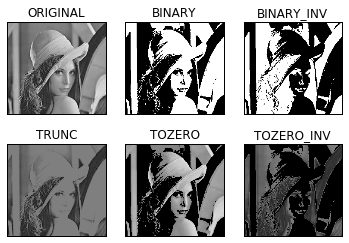

In [16]:
#画像の二値化とかなど
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lenna.jpg', 0) #グレーで読み出し
#最初の返り値は二値化する閾値、大津の二値化を使った場合は最適化された値が、それ以外は単純に指定した値が返る
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)#二値化
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)#二値化の白黒反転
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)#閾値を超えるものは255にするそれ以外はそのまま
print(thresh3)#上限が127になる事を確認

ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)#閾値以下をゼロにそれ以外はそのまま
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)#閾値以上をゼロにそれ以外はそのまま

titles = ['ORIGINAL', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', vmin = 0, vmax = 255) #vmin, vmaxを指定するときちんと表示
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

#matplotlibはデフォルトで補間もかけるし、正規化するし
#細かい部分はちゃんと確認すべし

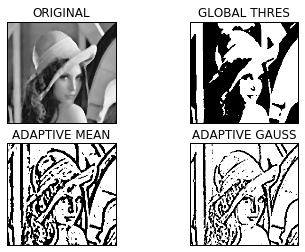

In [2]:
#適応二値化
#近傍画素の平均との差分で二値化する

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lenna.jpg', 0)#本当はチュートリみたいな影のある本とかの画像が良いのだが…
img = cv2.medianBlur(img, 5)#メディアンフィルタ、スパイクは平均値に割と影響を与えるので除いておく

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#cv2.adaptiveThreshold(img, maxVal, method, type ,blocksize, offset )
#blocksize分の近傍の平均からoffset引いた値より元のピクセル値が多きければmaxValに、そうでなければ0に
#typeはBINARYかBINARY_INV, methodは単純平均かガウシアン
#blocksizeは長方形にはできないのか…
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                           cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                           cv2.THRESH_BINARY, 11, 2)

titles = ['ORIGINAL', 'GLOBAL THRES', 'ADAPTIVE MEAN', 'ADAPTIVE GAUSS']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

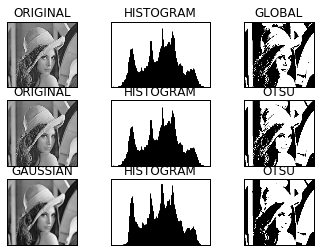

In [3]:
#大津の二値化
#いわずと知れた、よく出てくるやーつー
#でもあんまり役に立ったことがないのだが
#thresholdの第一返り値がなんのためにあるかというとこのため
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lenna.jpg', 0)

ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['ORIGINAL', 'HISTOGRAM', 'GLOBAL',
         'ORIGINAL', 'HISTOGRAM', 'OTSU',
         'GAUSSIAN', 'HISTOGRAM', 'OTSU']
for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
#まあこの画像だとそんな変わらんか。チュートリの画像は割と劇的ですごいですね